In [1]:
import os
import shutil
import matplotlib.pyplot as plt

In [5]:
base_dir="D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/train//small"
# os.mkdir(base_dir)#创建文件夹保存小数据集

In [6]:
#在创建的文件夹下，创建2个文件夹，分别存放训练集、验证集
train_dir=os.path.join(base_dir,"train")
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,"validation")
os.mkdir(validation_dir)

In [7]:
#在每个数据集下，创建子文件夹
train_mask_weared_incorrect_dir=os.path.join(train_dir,'mask_weared_incorrect')#不正确带口罩训练集的目录
os.mkdir(train_mask_weared_incorrect_dir)
train_with_mask_dir=os.path.join(train_dir,'with_mask')#带口罩训练集的目录
os.mkdir(train_with_mask_dir)
train_without_mask_dir=os.path.join(train_dir,'without_mask')#不带口罩训练集的目录
os.mkdir(train_without_mask_dir)

validation_mask_weared_incorrect_dir=os.path.join(validation_dir,'mask_weared_incorrect')#不正确带口罩训练集的目录
os.mkdir(validation_mask_weared_incorrect_dir)
validation_with_mask_dir=os.path.join(validation_dir,'with_mask')#带口罩训练集的目录
os.mkdir(validation_with_mask_dir)
validation_without_mask_dir=os.path.join(validation_dir,'without_mask')#不带口罩训练集的目录
os.mkdir(validation_without_mask_dir)

# 从这里开始

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_dir='D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/train/small/train/'
validation_dir='D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/train/small/validation/'


train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

vali_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

import numpy as np
train_data = np.zeros((6000,128,128,3)) #先声明一个"盒子"数组，6000表示图片总数
train_labels = []

for i in range(len(train_generator)):
    aa=train_generator.next()#获取每批次的图像和标签
    train_labels=np.hstack((train_labels,aa[1]))#将批次中的标签给labels列表
    for j in range(20):
        if 20*i+j<6000:
            train_data[20*i+j]=aa[0][j]#aa[0][j]装的是前面处理好的图片

print(train_labels.shape)
print(train_data.shape)

vali_data=np.zeros((2634,128,128,3))#声明一个装图片的盒子
vali_labels=[]

for i in range(len(vali_generator)):
    aa=vali_generator.next()#获取每批次的图像和标签
    vali_labels=np.hstack((vali_labels,aa[1]))#将批次中的标签给labels列表
    for j in range(20):
        if 20*i+j<2634:
            vali_data[20*i+j]=aa[0][j]#aa[0][j]装的是前面处理好的图片

print(vali_labels.shape)
print(vali_data.shape)

Using TensorFlow backend.


Found 6000 images belonging to 3 classes.
Found 2634 images belonging to 3 classes.
(6000,)
(6000, 128, 128, 3)
(2634,)
(2634, 128, 128, 3)


In [2]:
# 1.3 标签处理one-hot码
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
vali_labels = to_categorical(vali_labels)
print(train_labels)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [3]:
# 2.1 加载VGG16
from keras.applications import VGG16

In [4]:
conv_base_vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))
conv_base_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [5]:
# 2.2 构建网络
from keras import models
from keras import layers
from keras import regularizers

model=models.Sequential()
model.add(conv_base_vgg16)#添加VGG16卷积层
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [6]:
conv_base_vgg16.summary()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [7]:
#冻结一部分的卷积神经网络
conv_base_vgg16.trainable=True

set_trainable=False
for layer in conv_base_vgg16.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [8]:
# #2.2 构建网络
# from keras import models
# from keras import layers
# from keras import regularizers
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))) 
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))


# #全连接层
# model.add(layers.Flatten())
# #隐藏层
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(512,activation='relu'))
# #输出层
# model.add(layers.Dense(3,activation='softmax'))#多分类
# model.summary()

In [9]:
#配置优化器与训练（多分类）
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

#模型训练
history=model.fit(train_data,train_labels,batch_size=16,epochs=15,validation_data=(vali_data,vali_labels))

Train on 6000 samples, validate on 2634 samples
Epoch 1/15
6000/6000 [==============================] - 323s 54ms/step - loss: 1.0884 - acc: 0.9429 - val_loss: 0.3574 - val_acc: 0.9720
Epoch 2/15
6000/6000 [==============================] - 310s 52ms/step - loss: 0.2031 - acc: 0.9803 - val_loss: 0.1735 - val_acc: 0.9671
Epoch 3/15
6000/6000 [==============================] - 279s 47ms/step - loss: 0.0816 - acc: 0.9868 - val_loss: 0.1600 - val_acc: 0.9730
Epoch 4/15
6000/6000 [==============================] - 284s 47ms/step - loss: 0.0509 - acc: 0.9908 - val_loss: 0.1324 - val_acc: 0.9752
Epoch 5/15
6000/6000 [==============================] - 286s 48ms/step - loss: 0.0323 - acc: 0.9937 - val_loss: 0.2223 - val_acc: 0.9641
Epoch 6/15
6000/6000 [==============================] - 284s 47ms/step - loss: 0.0255 - acc: 0.9946 - val_loss: 0.1898 - val_acc: 0.9722
Epoch 7/15
6000/6000 [==============================] - 284s 47ms/step - loss: 0.0232 - acc: 0.9958 - val_loss: 0.1042 - val_acc: 

In [10]:
history_dict_1 = history.history

ERROR! Session/line number was not unique in database. History logging moved to new session 1432


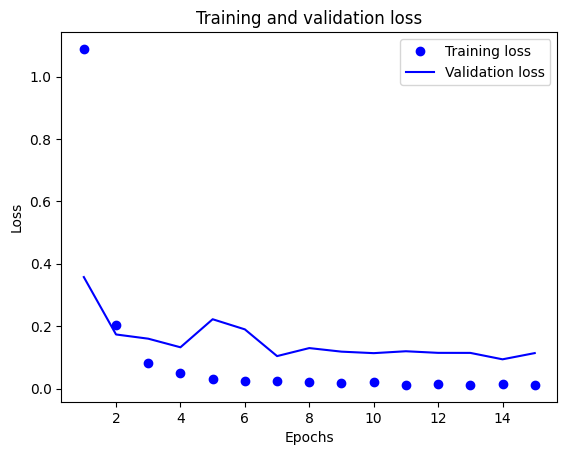

In [11]:
#对训练集和验证集的损失值作图
import matplotlib.pyplot as plt
history_dict_1 = history.history
loss_values = history_dict_1['loss']
val_loss_values = history_dict_1['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

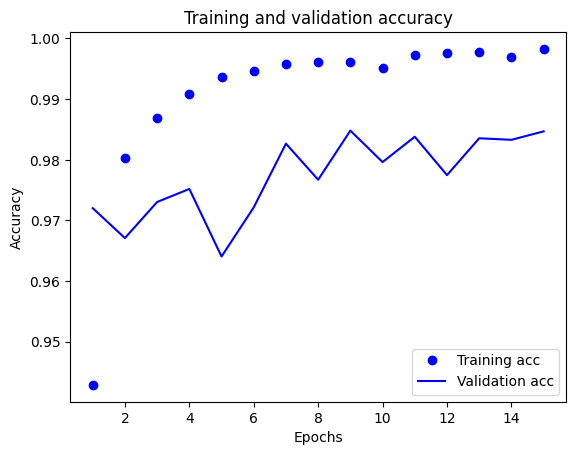

In [12]:
#对训练集和验证集的accuracy作图
plt.clf() 
acc = history_dict_1['acc'] 
val_acc = history_dict_1['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#处理测试集
import csv
import os
import shutil 
csv_path="D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/sample_submit.csv"#csv文件地址
picture_path="D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/test/"#图片文件夹地址
image="path"#csv文件第一列名称
labels="label"#csv文件第二列名称
 
with open(csv_path) as f:
    f_csv=csv.DictReader(f)
    for row in f_csv:
        if not os.path.exists(picture_path+row.get(labels)):
            os.mkdir(picture_path+row.get(labels))
        shutil.move(picture_path+row.get(image),picture_path+row.get(labels)+'/'+row.get(image)) #zp

FileNotFoundError: [Errno 2] No such file or directory: 'D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/test/4UI62PHL23.jpg'

In [13]:
test_dir='D:/作业/python/B/《计算机视觉与应用实验》期末考核方案/口罩佩戴识别挑战赛公开数据集/test'
#测试集数据处理
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

test_data=np.zeros((1260,128,128,3))#声明一个装图片的盒子
for i in range(len(test_generator)):
    aa=test_generator.next()#获取每批次的图像和标签
    for j in range(20):
        if 20*i+j<1260:
            test_data[20*i+j]=aa[0][j]#aa[0][j]装的是前面处理好的图片

Found 1260 images belonging to 3 classes.


In [14]:
pred=model.predict(test_data)
pred

array([[4.5296806e-21, 2.7608274e-21, 1.0000000e+00],
       [5.7580446e-17, 5.4628275e-17, 1.0000000e+00],
       [1.5611431e-04, 1.7568446e-04, 9.9966824e-01],
       ...,
       [7.4153600e-11, 5.6386406e-11, 1.0000000e+00],
       [1.9544643e-07, 2.4538849e-07, 9.9999952e-01],
       [1.0755712e-25, 1.0000000e+00, 1.5209412e-25]], dtype=float32)

In [15]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions

['without_mask',
 'without_mask',
 'without_mask',
 'mask_weared_incorrect',
 'with_mask',
 'without_mask',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'without_mask',
 'without_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'without_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 'mask_weared_incorrect',
 'with_mask',
 'mask_weared_incorrect',
 'without_mask',
 'without_mask',
 'without_mask',
 'mask_weared_incorrect',
 'with_mask',
 'with_mask',
 'without_mask',
 'mask_weared_incorrect',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'without_mask',
 'mask_weared_incorrect',
 'without_mask',
 'with_mask',
 'with_mask',
 'without_mask',
 'mask_weared_incorrect',
 'without_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 'without